<h1> <b> CS374 - Computational and Numerical Methods Lab 7 </b> </h1>

```
Vraj Gandhi        -  202201425
Kaushik Prajapati  -  202201472
```

<h2> <b>Interpolation </b></h2>
<p> Basic library importing for ploting, styling and table creation.

In [26]:
import numpy as np
import math as mt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

<p> Interpolation class with eleven important methods.

1. <i><b>initialization()</b></i> : Method that stores dataset and computes newton polynomial factors and lagrang's polynomial factors.
2. <i><b>vandermonde_matrix()</b></i> : Method to generate Vandermonde Matrix using given dataset.
3. <i><b>vandermonde_polynomial_coefficients()</b></i> : Method that solves Vandermonde Matrix and calculates polynomial coefficients.
4. <i><b>lagrange_factors()</b></i> : Method that calculates multiplicative factors of Lagrang's Polynomial Interpolation.
5. <i><b>lagranges_polynomial_coefficients()</b></i> : Method that calculates polynomial coefficients for Lagrange's Interpolation.
6. <i><b>lagrange_polynomial()</b></i> : Method to find approximated value of function $f(x)$ at point $x$ using Lagrange's Interpolation.
7. <i><b>plotLI()</b></i> : Method to plot the Lagrange's Intepolated Polynomial.
8. <i><b>newton_factors()</b></i> : Method that calculates multiplicative factors of Newton's Polynomial Interpolation.
9. <i><b>newtons_polynomial_coefficients()</b></i> : Method that calculates polynomial coefficients for Newton's Interpolation.
10. <i><b>newton_polynomial()</b></i> : Method to find approximated value of function $f(x)$ at point $x$ using Newton's Interpolation.
11. <i><b>plotN()</b></i> : Method to plot the Newton's Intepolated Polynomial.






In [27]:
class interpolation:

    def __init__(self, points):
        if points:
            self.initialization(points)

    def initialization(self, points):
        self.points = points
        self.N = len(points)
        self.x = [self.points[i][0] for i in range(self.N)]
        self.y = [self.points[i][1] for i in range(self.N)]
        self.new_factors = self.newton_factors()
        self.lag_factors = self.lagrange_factors()
        self.spline_lin_coefficients = self.spline_linear_coefficients()

    ##### Finding Interpolated Polynomial Coefficients using Vandermonde Matrix

    ## Function to find Vandermonde Matrix V
    def vandermonde_matrix(self):
        V = np.zeros((self.N, self.N))
        for i in range(self.N):
            for j in range(self.N):
                V[i][j] = self.x[i] ** j
        return V

    ## Solving system of linear equations to find polynomial coefficients
    def vandermonde_polynomial_coefficients(self):
        V = self.vandermonde_matrix()
        coefficients = np.linalg.solve(V, self.y)
        return list(np.round(coefficients, 8))

    ##### End

    ##### Lagrang's Interpolation

    ## Lagrange's Polynomial Multiplication Factors
    def lagrange_factors(self):
        factors = np.zeros(self.N)
        for i in range(self.N):
            yi = self.y[i]
            div = 1.0
            for j in range(self.N):
                if i != j:
                    div *= (self.x[i] - self.x[j])
            factors[i] = yi / div
        return factors


    ## Finding Interpolated Polynomial Coefficients using Lagrang's Method
    def lagranges_polynomial_coefficients(self):

        # stores coeffi of power [x^0, x^1, ..., x^n]
        p_coefficients = np.zeros(self.N, dtype=float)

        # for each Lk
        for k in range(self.N):

            # x-values that contribute to this Lk
            values = self.x[:k] + self.x[k+1:]

            # stores coeffi of power [x^0, x^1, ..., x^n] for Lk()
            coeffi_k = []

            # Generation of nCk and finding coefficients
            for j in range(len(values), -1, -1):

                combinations_list = list(combinations(values, j))
                coeffi_of_power_j = 0

                for comb in combinations_list:
                    product = 1
                    for val in comb:
                        product *= val
                    coeffi_of_power_j += product
                # End

                coeffi_k.append((-1)**(j) * self.lag_factors[k] * coeffi_of_power_j)
            # End

            p_coefficients += np.array(coeffi_k)
        return list(np.round(p_coefficients, 8))

    ## Lagrange's Polynomial Approximation
    def lagrange_polynomial(self, x):
        res = 0.0
        for k in range(self.N):
            prod = 1.0
            for i in range(self.N):
                if i == k:
                    continue
                prod *= (x - self.points[i][0])
            res += self.lag_factors[k] * prod
        return res

    ## Plot Lagranges Interpolated Polynomial
    def plotLI(self, function=[], xlim=(-5, 5), ylim=(-5, 5), N = 100, title="Lagrange's Interpolation"):

        x_values = np.linspace(xlim[0], xlim[1], N)
        y_aprx = np.zeros(N, dtype=float)
        for i in range(N):
            y_aprx[i] = self.lagrange_polynomial(x_values[i])

        plt.figure(figsize=(8, 6))
        if len(function) != 0:
            y_actual = function[0](x_values)
            plt.plot(x_values, y_actual, label="Actual Function")
        plt.plot(self.x, self.y, 'o', label="Points")
        plt.plot(x_values, y_aprx, label="Lagrange's Interpolation")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.grid()
        plt.show()
        return y_aprx

    ##### End


    ##### Newton's Interpolation

    ## Newtons's Polynomial factors
    def newton_factors(self):
        divided_diff = np.zeros((self.N, self.N)) # DD table
        divided_diff[:, 0] = self.y

        # Compute DD table values
        for j in range(1, self.N):
            for i in range(self.N - j):
                divided_diff[i][j] = (divided_diff[i+1][j-1] - divided_diff[i][j-1]) / (self.x[i+j] - self.x[i])

        # Diagonals are divided difference factors of newtons interpolated polynomial
        factors = divided_diff[0, :]
        return factors


    ## Finding Interpolated Polynomial Coefficients using Lagrang's Method
    def newtons_polynomial_coefficients(self):

        # stores coeffi of power [x^0, x^1, ..., x^n]
        p_coefficients = np.zeros(self.N, dtype=float)

        for k in range(self.N):

            # x-values that contribute to this Lk
            values = self.x[:k]

            # stores coeffi of power [x^0, x^1, ..., x^n] for kth term
            coeffi_k = []

            # Generation of nCk and finding coefficients
            for j in range(len(values), -1, -1):

                combinations_list = list(combinations(values, j))
                coeffi_of_power_j = 0

                for comb in combinations_list:
                    product = 1
                    for val in comb:
                        product *= val
                    coeffi_of_power_j += product
                # End

                coeffi_k.append((-1)**(j) * coeffi_of_power_j)
            # End

            # Appending n-k zeros
            for j in range(k+1, self.N):
                coeffi_k.append(0.0)

            p_coefficients += (self.new_factors[k] * np.array(coeffi_k))
        return list(np.round(p_coefficients, 8))


    ## Newton's Polynomial Approximation
    def newton_polynomial(self, x):
        result = self.new_factors[0]
        prod = 1.0
        for i in range(1, self.N):
            prod *= (x - self.points[i-1][0])
            result += self.new_factors[i] * prod
        return result

    ## Plot Newton's Interpolated Polynomial
    def plotN(self, function=[], xlim=(-5, 5), ylim=(-5, 5), N = 100, true_plot=True, title="Newton's Interpolation"):

        x_values = np.linspace(xlim[0], xlim[1], N)
        y_aprx = np.zeros(N, dtype=float)
        for i in range(N):
            y_aprx[i] = self.newton_polynomial(x_values[i])

        plt.figure(figsize=(8, 6))
        if len(function) != 0:
            y_actual = function[0](x_values)
            plt.plot(x_values, y_actual, label="Actual Function")
        plt.plot(self.x, self.y, 'o', label="Points")
        plt.plot(x_values, y_aprx, label="Newton's Interpolation")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(title)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.grid()
        plt.show()
        return y_aprx

    ##### End


    ##### Spline Interpolation

    ## Linear Spline Interpolation Coefficients finding
    def spline_linear_coefficients(self):
        k = self.N
        coefficients = []
        for i in range(k-1):
            m = (self.y[i+1] - self.y[i]) / (self.x[i+1] - self.x[i])
            c = self.y[i] - m * self.x[i]
            coefficients.append([m, c])
        return coefficients

    ## Spline linearly interpolated function
    def spline_polynomial(self, x):
        w = self.spline_lin_coefficients
        for i in range(self.N-1):
            if x >= self.x[i] and x <= self.x[i+1]:
                return w[i][1] + w[i][0] * x
        return 0

    ## Plot for spline linear interpolation
    def plot_linear_spline(self, function=[], xlim=(-5, 5), ylim=(-5, 5), N = 100, true_plot=True, title="Linear Spline Interpolation"):

        x_values = np.linspace(xlim[0], xlim[1], N)
        y_aprx = np.zeros(N, dtype=float)
        for i in range(N):
            y_aprx[i] = self.spline_polynomial(x_values[i])

        plt.figure(figsize=(8, 6))
        if len(function) != 0:
            y_actual = function[0](x_values)
            plt.plot(x_values, y_actual, label="Actual Function")

        plt.plot(self.x, self.y, 'o', label="Points")
        plt.plot(x_values, y_aprx, label="Linear Spline Interpolation")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title(title)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.grid()
        plt.show()
        return y_aprx

<h2> <b>Lagrange's Interpolation and Newton's Interpolation </b></h2>


<p align='justify'> <b>Q1.</b> With the data in the following table:

<table>
  <tr>
    <th style=70>X</th>
    <td>3.35</td>
    <td>3.40</td>
    <td>3.50</td>
    <td>3.60</td>
  </tr>
  <tr>
    <th>F(X)</th>
    <td>0.298507</td>
    <td>0.294118</td>
    <td>0.285714</td>
    <td>0.277778</td>
  </tr>
</table>

<p align='justify'> <b>(a)</b> Produce Lagrange polynomials of the linear, quadratic and cubic orders with increasing values of x.

In [28]:
points = [[3.35, 0.298507], [3.4, 0.294118], [3.5, 0.285714], [3.6, 0.277778]]
xlim=(2, 6)
ylim=(0.2, 0.5)

<h3> Linear Interpolation

In [29]:
inter = interpolation(points[:2])
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l, end='\n\n')
y_aprx_Llinear = inter.plotLI(xlim=xlim, ylim=ylim, title='Linear Interpolation')

Vandermonde Polynomial Coefficients:  [0.59257, -0.08778]
Lagranges Polynomial Coefficients:  [0.59257, -0.08778]



<h3> Quadratic Interpolation

Vandermonde Polynomial Coefficients:  [0.87656067, -0.25608, 0.02493333]
Lagranges Polynomial Coefficients:  [0.87656067, -0.25608, 0.02493333]



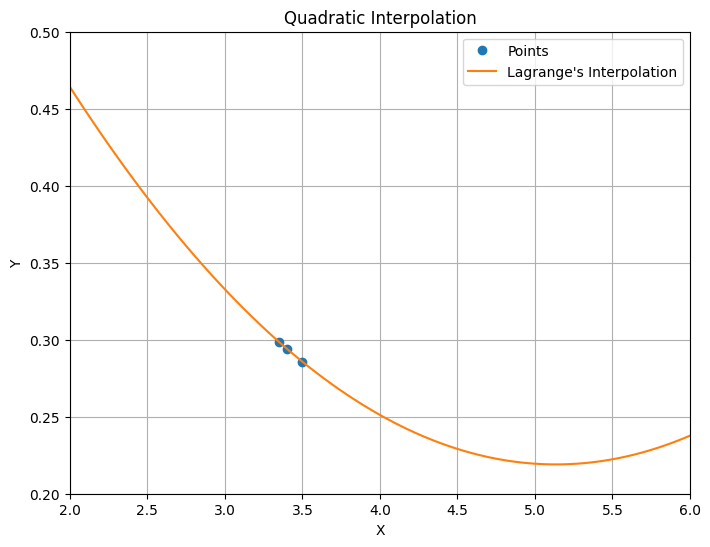

In [30]:
inter = interpolation(points[:3])
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l, end='\n\n')
y_aprx_Lquad = inter.plotLI(xlim=xlim, ylim=ylim, title='Quadratic Interpolation')

<h3> Cubic Interpolation

Vandermonde Polynomial Coefficients:  [1.121066, -0.47083867, 0.0878, -0.00613333]
Lagranges Polynomial Coefficients:  [1.121066, -0.47083867, 0.0878, -0.00613333]



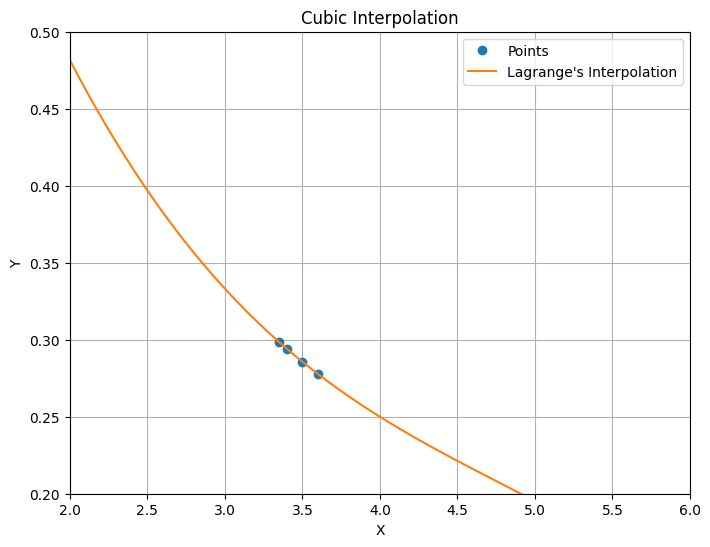

In [31]:
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l, end='\n\n')
y_aprx_Lcubic = inter.plotLI(xlim=xlim, ylim=ylim, title='Cubic Interpolation')

<p align='justify'> <b>(b)</b> Produce Newton's divided-difference polynomial so fall the three foregoing orders.

<h3> Linear Interpolation

In [32]:
inter = interpolation(points[:2])
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Newtons Polynomial Coefficients: ", coeff_n, end='\n\n')
y_aprx_NLinear = inter.plotN(xlim=xlim, ylim=ylim, title='Linear Interpolation')

Vandermonde Polynomial Coefficients:  [0.59257, -0.08778]
Newtons Polynomial Coefficients:  [0.59257, -0.08778]



<h3> Quadratic Interpolation

Vandermonde Polynomial Coefficients:  [0.87656067, -0.25608, 0.02493333]
Newtons Polynomial Coefficients:  [0.87656067, -0.25608, 0.02493333]



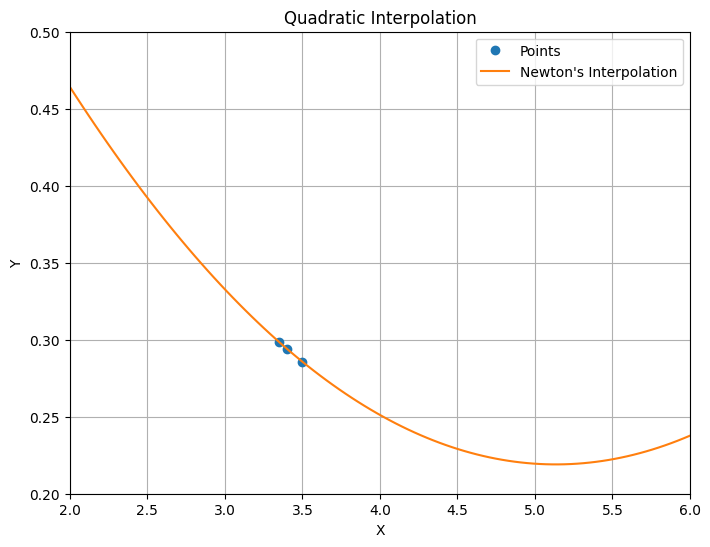

In [33]:
inter = interpolation(points[:3])
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Newtons Polynomial Coefficients: ", coeff_n, end='\n\n')
y_aprx_Nquad = inter.plotN(xlim=xlim, ylim=ylim, title='Quadratic Interpolation')

<h3> Cubic Interpolation

In [34]:
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Newtons Polynomial Coefficients: ", coeff_n, end='\n\n')
y_aprx_Ncubic = inter.plotN(xlim=xlim, ylim=ylim, title='Cubic Interpolation')

Vandermonde Polynomial Coefficients:  [1.121066, -0.47083867, 0.0878, -0.00613333]
Newtons Polynomial Coefficients:  [1.121066, -0.47083867, 0.0878, -0.00613333]



<p align='justify'> <b>(c)</b> Plot the results of both methods on the same graph and compare them with the function $y = 1/x$. Also comment on the respective computational advantages of the two methods above.

<h3> Linear Interpolation Comparision

In [35]:
x_values = np.linspace(xlim[0], xlim[1], 100)
y_values = 1/x_values

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(inter.x, inter.y, 'o', label="Points", markersize=8)
plt.plot(x_values, y_values, label="xy = 1")
plt.plot(x_values, y_aprx_Llinear, label="Lagrange's Linear", linewidth=4)
plt.plot(x_values, y_aprx_NLinear, label="Newton's Linear", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Polynomial")
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.grid()
plt.show()

<h3> Quadratic Interpolation Comparision

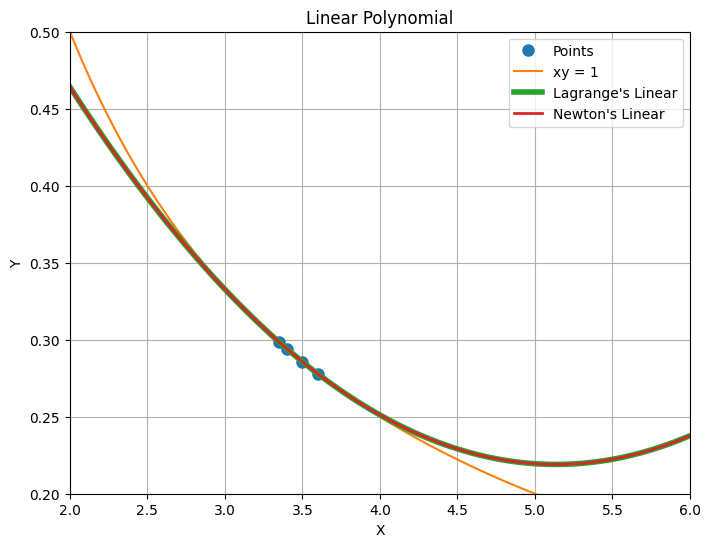

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(inter.x, inter.y, 'o', label="Points", markersize=8)
plt.plot(x_values, y_values, label="xy = 1")
plt.plot(x_values, y_aprx_Lquad, label="Lagrange's Linear", linewidth=4)
plt.plot(x_values, y_aprx_Nquad, label="Newton's Linear", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Polynomial")
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.grid()
plt.show()

<h3> Cubic Interpolation Comparision

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(inter.x, inter.y, 'o', label="Points", markersize=8)
plt.plot(x_values, y_values, label="xy = 1")
plt.plot(x_values, y_aprx_Lcubic, label="Lagrange's Linear", linewidth=4)
plt.plot(x_values, y_aprx_Ncubic, label="Newton's Linear", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Polynomial")
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.grid()
plt.show()

<p align='justify'> <b>Q2.</b> With the data in the following table:

<table>
  <tr>
    <th>X</th>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>2.5</td>
    <td>3</td>
    <td>3.5</td>
    <td>4</td>
  </tr>
  <tr>
    <th>F(X)</th>
    <td>2.5</td>
    <td>0.5</td>
    <td>0.5</td>
    <td>1.5</td>
    <td>1.5</td>
    <td>1.125</td>
    <td>0</td>
  </tr>
</table>

<p align='align'> <b>(a)</b> Interpolate successive points by straight line segments. This is known as piecewise linear interpolation.

<h3> Piecewise Linear Interpolation

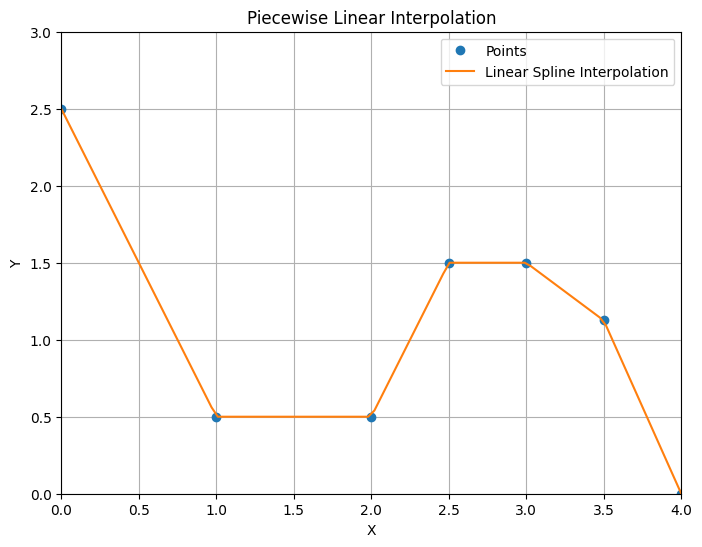

In [39]:
x = np.array([0, 1, 2, 2.5, 3, 3.5, 4])
y = np.array([2.5, 0.5, 0.5, 1.5, 1.5, 1.125, 0])

inter = interpolation(list(zip(x, y)))
c = inter.plot_linear_spline(xlim=(0, 4), ylim=(0, 3), title='Piecewise Linear Interpolation')

<p align='justify'> <b>(b)</b> On each of the three following subintervals of $x$, $[0, 2], [2, 3]$ and $[3, 4]$ interpolate using both Lagrange's quadratic polynomial and Newton's divided-difference interpolation polynomial.

<h3> Quadratic Interpolation for subintervals of $x$, $[0, 2], [2, 3]$ and $[3, 4]$





In [40]:
points = [[0, 2.5], [1, 0.5], [2, 0.5], [2.5, 1.5], [3, 1.5], [3.5, 1.125], [4, 0]]
inter_1 = interpolation(points[:3])
inter_2 = interpolation(points[2:5])
inter_3 = interpolation(points[4:])

x_1 = list(np.linspace(0, 2, 100))
x_2 = list(np.linspace(2, 3, 100))
x_3 = list(np.linspace(3, 4, 100))

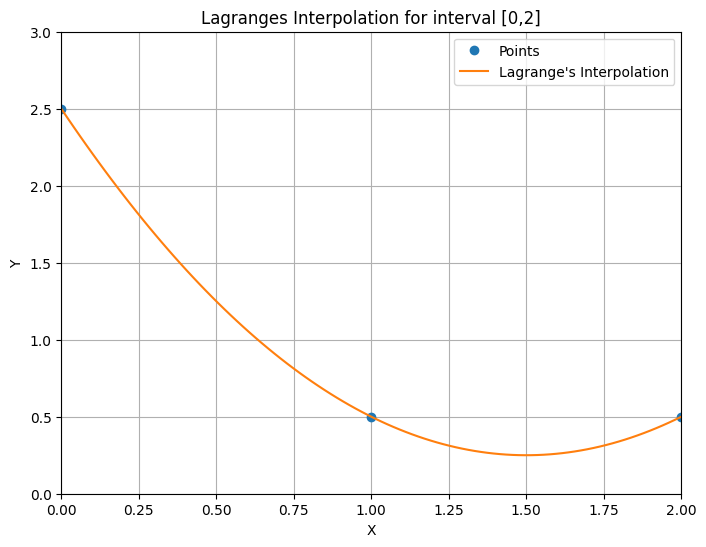

In [41]:
y_aprx_1_L = inter_1.plotLI(xlim=(0, 2), ylim=(0, 3), title='Lagranges Interpolation for interval [0,2]')
y_aprx_2_L = inter_2.plotLI(xlim=(2, 3), ylim=(0, 3), title='Lagranges Interpolation for interval [2,3]')
y_aprx_3_L = inter_3.plotLI(xlim=(3, 4), ylim=(0, 3), title='Lagranges Interpolation for interval [3,4]')

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label="Points")
plt.plot(x_1, y_aprx_1_L, label="[0,2]")
plt.plot(x_2, y_aprx_2_L, label="[2,3]")
plt.plot(x_3, y_aprx_3_L, label="[3,4]")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lagrange's Quadratic")
plt.grid()
plt.legend()

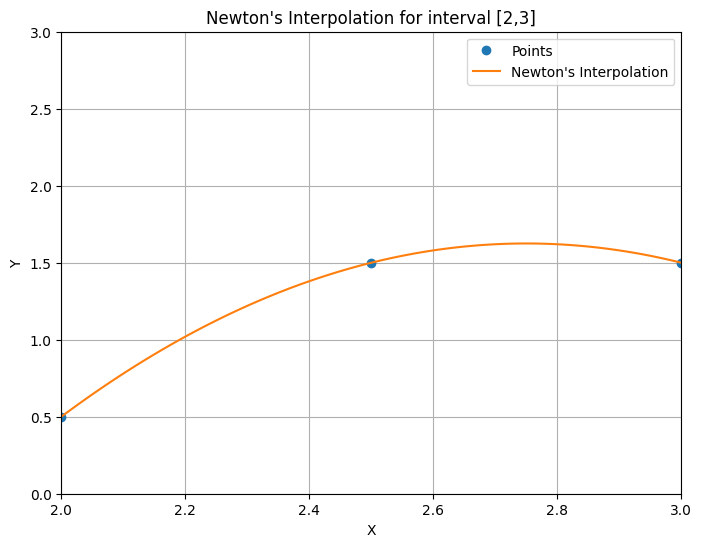

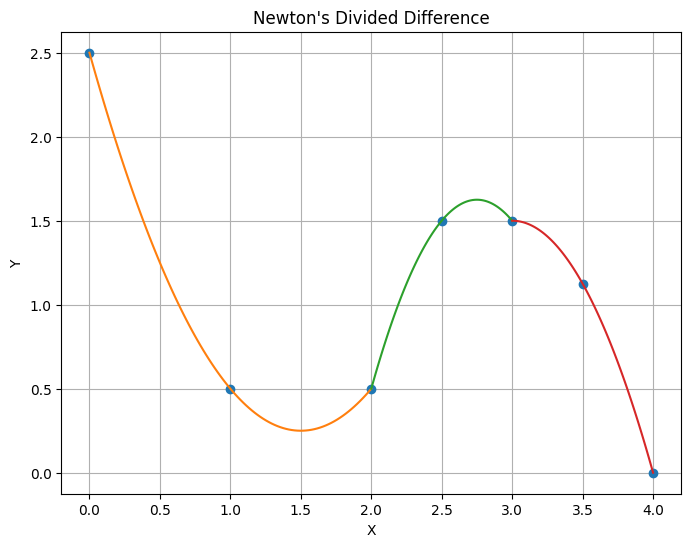

In [42]:
y_aprx_1_N = inter_1.plotN(xlim=(0, 2), ylim=(0, 3), title="Newton's Interpolation for interval [0,2]")
y_aprx_2_N = inter_2.plotN(xlim=(2, 3), ylim=(0, 3), title="Newton's Interpolation for interval [2,3]")
y_aprx_3_N = inter_3.plotN(xlim=(3, 4), ylim=(0, 3), title="Newton's Interpolation for interval [3,4]")

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label="Points")
plt.plot(x_1, y_aprx_1_N, label="[0,2]")
plt.plot(x_2, y_aprx_2_N, label="[2,3]")
plt.plot(x_3, y_aprx_3_N, label="[3,4]")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Newton's Divided Difference")
plt.grid()

<p align='justify'> <b>(c)</b> Plot the results of both methods covering all the three subintervals on the same graph and compare them.


<h3> Comparision Plot

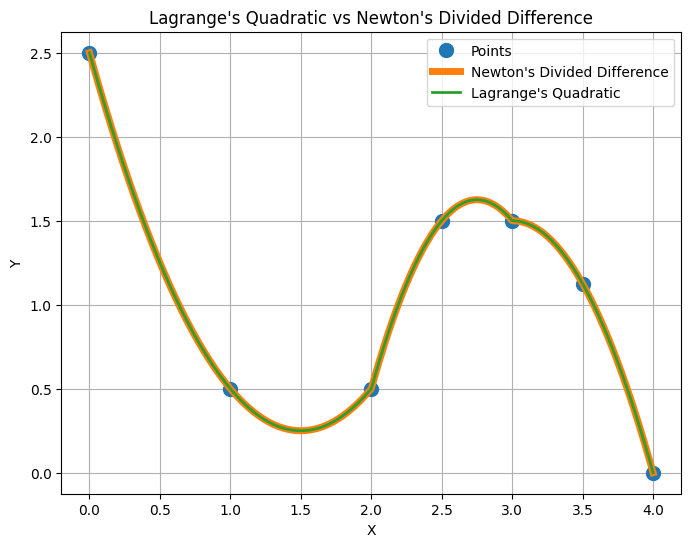

In [43]:
x_list = list(x_1) + list(x_2) + list(x_3)
yL_list = list(y_aprx_1_L) + list(y_aprx_2_L) + list(y_aprx_3_L)
yN_list = list(y_aprx_1_N) + list(y_aprx_2_N) + list(y_aprx_3_N)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label="Points", markersize=10)
plt.plot(x_list, yN_list, label="Newton's Divided Difference", linewidth=5)
plt.plot(x_list, yL_list, label="Lagrange's Quadratic", linewidth=2)
plt.title("Lagrange's Quadratic vs Newton's Divided Difference")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()

<p align='justify'> <b> Conclusion: </b> Newton's method is generally better for interpolation because it allows easier updates when new data points are added without recalculating the entire polynomial. This makes it more efficient and flexible for larger or changing datasets compared to Lagrange's method, which requires recalculating the entire polynomial for any modification.

<p align='justify'> <b>Q3.</b> Write a function that implements a least square polynomial fit. The function should take in two vectors $x$ and $y$ (each of size $n$x$1$), and the degree of the polynomial $(m$ < $n)$ and output the coefficient vector of the polynomial that minimizes the least square error.

In [44]:
def generateAMatrix(M, X):
    A = []
    for x in X:
        row = []
        for i in range(M, -1, -1):
            row.append(x ** i)
        A.append(np.array(row))
    return np.array(A)

def train_regression_model(A, y):
    At = np.transpose(A)
    At_A = At.dot(A)
    At_A_inv = np.linalg.inv(At_A)
    At_A_inv_At = At_A_inv.dot(At)
    u = At_A_inv_At.dot(y)
    return u

def predict_regression_model(M, X, u):

    x = np.array(X)
    y = np.zeros(len(x), dtype=float)
    for i in range(M, -1, -1):
        y += u[M-i] * (x ** i)
    return y

def least_square_polynomial_fit(x, y, M):
    A = generateAMatrix(M, x)
    u = train_regression_model(A, y)
    return u

def RMSE(y_t, y_p):
    return np.sqrt(np.mean((np.array(y_t) - np.array(y_p)) ** 2))

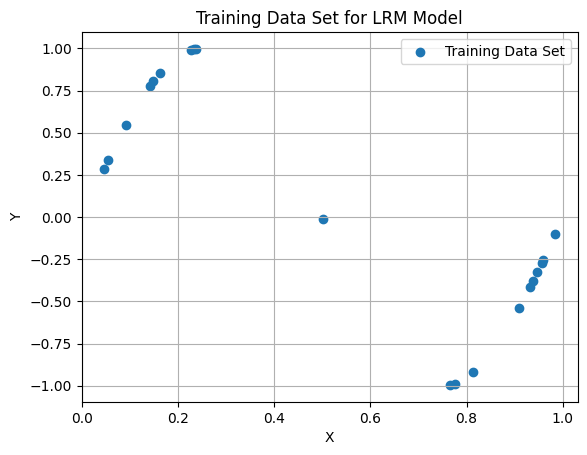

In [45]:
N = 20
x_train = np.array(sorted(np.random.uniform(0, 1, N)))
y_train = np.sin(2 * np.pi * x_train)

x_test = np.linspace(0, 1, 100)
y_test = np.sin(2 * np.pi * x_test)

plt.scatter(x_train, y_train, label='Training Data Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data Set for LRM Model')
plt.legend()
plt.grid()
plt.show()

In [46]:
M_values = [1, 2, 3, 5]

plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, 'o', label='Data Set')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title(f'Regression Model')
plt.legend(loc='best')
plt.grid()
for m in M_values:

    W = least_square_polynomial_fit(x = x_train, y = y_train, M = m)
    y_pred = predict_regression_model(M = m, X = x_test, u = W)
    rmse = RMSE(y_test, y_pred)

    print(f"\nEstimated coefficients for M = {m}: ", W)
    print(f"RMSE for M = {m}: ", rmse)

    plt.plot(x_test, y_pred, label=f'Estimate for m={m}')
    plt.legend(loc='best')

plt.show()


Estimated coefficients for M = 1:  [-1.45991936  0.85901486]
RMSE for M = 1:  0.4826508525244759

Estimated coefficients for M = 2:  [ 1.00383527 -2.51733144  0.99858704]
RMSE for M = 2:  0.47391710077886606

Estimated coefficients for M = 3:  [ 22.0621103  -33.25237958  11.56731367  -0.21525214]
RMSE for M = 3:  0.07647198599928667

Estimated coefficients for M = 5:  [-5.21594274e+01  1.30632020e+02 -9.34577444e+01  9.38295275e+00
  5.57362702e+00  1.72180169e-02]
RMSE for M = 5:  0.007628795342951755


<p align='justify'> <b> Summary: </b> The least squares polynomial fit method can be used to find a curve that best matches a set of data points. It works by finding a polynomial that minimizes the difference between the actual data points and the values predicted by the polynomial. The method reduces the overall error by squaring the differences and adding them up, making it useful when the data has some errors or noise. A higher-degree polynomial gives a more flexible fit, but if it's too complex, it might not represent the true trend well.